# 2022 MathorCup 大数据 IssueB

# 上网业务数据分析

## 初步导入相关第三方库

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sp
import warnings
warnings.filterwarnings("ignore")

## 读取附件2与附件4

In [2]:
dataTwo=pd.read_excel("附件2上网业务用户满意度数据.xlsx",sheet_name='用后即评满意度分析0620(Q1655704201796)_P')
dataFour=pd.read_excel("附件4上网业务用户满意度预测数据.xlsx",sheet_name='上网')

In [3]:
dataTwo

,用户,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,办公室,高校,商业街,地铁,...,畅享套餐档位,畅享套餐名称,主套餐档位,当月MOU,近3个月平均消费（剔除通信账户支付）,近3个月平均消费（元）,本年累计消费（元）,码号资源-激活时间,码号资源-发卡时间,客户星级标识
0,用户1,8,7,7,7,-1,-1,-1,-1,-1,...,9,畅享套餐9档-语音9流量0,9,54,9.20,9.20,36.60,2020-07-17,2020-06-29,一星
1,用户2,9,9,8,9,-1,-1,-1,-1,5,...,0,0,49,172,21.00,21.00,81.49,2021-12-29,2021-12-25,未评级
2,用户3,4,3,3,3,1,2,3,4,5,...,129,畅享套餐129档-语音29新流量100,129,206,69.00,69.00,276.10,2021-11-01,2021-10-29,一星
3,用户4,9,8,8,7,-1,-1,-1,-1,5,...,0,0,49,1930,81.57,81.57,331.10,2021-08-23,2021-08-23,一星
4,用户5,10,10,10,10,1,-1,3,-1,-1,...,0,0,49,18,21.00,21.00,84.00,2021-08-02,2021-08-02,准星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,用户7016,10,10,10,10,-1,-1,-1,-1,-1,...,189,畅享套餐189档-语音189流量0,189,377,205.00,205.00,820.00,NaT,2021-09-16,三星
7016,用户7017,9,9,9,9,-1,-1,-1,-1,5,...,189,畅享套餐189档-语音189流量0,189,208,205.00,205.00,820.30,NaT,2020-05-16,三星
7017,用户7018,10,10,10,10,-1,-1,-1,-1,-1,...,189,畅享套餐189档-语音189流量0,189,444,205.00,205.00,820.00,NaT,2020-08-14,三星
7018,用户7019,5,5,5,5,1,2,-1,4,-1,...,189,畅享套餐189档-语音189流量0,189,392,205.00,205.00,820.00,NaT,2020-05-14,三星


In [4]:
dataFour

,用户id,是否遇到网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,1,1,-1,-1,-1,-1,6,7,-1,...,105.00,119,100.00,145,0.000000,2215643,0,是,银卡,否
1,2,1,-1,-1,-1,-1,-1,6,-1,-1,...,140.00,64,233.99,87,0.000000,23273941,0,否,银卡,否
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,20.09,33,19.71,32,0.000000,2088114,0,是,三星,否
3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,...,11.25,153,16.65,292,0.000269,3691155,993,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,51.00,110,41.15,31,0.000000,40765275,0,是,三星,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1606,2,-1,-1,-1,-1,-1,-1,-1,-1,...,115.00,305,115.00,260,0.000000,24118010,0,是,银卡,否
1606,1607,1,1,-1,-1,-1,-1,-1,-1,-1,...,9.00,90,9.30,25,0.000000,11553961,0,是,三星,否
1607,1608,1,1,2,-1,-1,-1,-1,-1,-1,...,9.50,197,10.50,203,0.000000,2308312,0,是,二星,否
1608,1609,1,1,-1,-1,-1,-1,-1,-1,-1,...,130.30,107,130.00,168,0.000000,11508141,0,否,银卡,否


## 处理附件2与附件4

### 查看附件2与附件4表头交集

In [5]:
list(set(list(dataTwo.columns))&set(list(dataFour.columns)))

['爱奇艺',
 '阴阳师',
 '上网质差次数',
 '是否不限量套餐到达用户',
 '芒果TV',
 '其他，请注明.4',
 '其他，请注明.5',
 '微信质差次数',
 '办公室',
 '下载速度慢',
 '性别',
 '王者荣耀',
 '和平精英',
 '欢乐斗地主',
 '居民小区',
 '穿越火线',
 '地铁',
 '龙之谷',
 '上网过程中网络时断时续或时快时慢',
 '快手',
 '咪咕视频',
 '百度',
 '是否5G网络客户',
 '抖音',
 '拼多多',
 '农村',
 '手机QQ',
 '其他，请注明.2',
 '淘宝',
 '脱网次数',
 '手机上网速度慢',
 '其他，请注明.1',
 '全部网页或APP都慢',
 '新浪微博',
 '看视频卡顿',
 '打游戏延时大',
 '京东',
 '部落冲突',
 '搜狐视频',
 '微信',
 '套外流量费（元）',
 '商业街',
 '全部游戏都卡顿',
 '腾讯视频',
 '终端品牌',
 '打开网页或APP图片慢',
 '其他，请注明',
 '客户星级标识',
 '梦幻西游',
 '优酷',
 '显示有信号上不了网',
 '套外流量（MB）',
 '其他，请注明.3',
 '火山',
 '炉石传说',
 '终端品牌类型',
 '当月MOU',
 '高校',
 '梦幻诛仙',
 '网络信号差/没有信号',
 '手机支付较慢',
 '全部都卡顿',
 '高铁',
 '今日头条']

### 剔除不重合的的列指标，以及不重要列指标

In [6]:
dataTwo=dataTwo[['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性',
                 '居民小区','是否5G网络客户','高校',
                 '是否不限量套餐到达用户','其他，请注明.5','咪咕视频','阴阳师',
                 '手机QQ','手机上网速度慢','炉石传说','打游戏延时大',
                 '火山','显示有信号上不了网','今日头条','办公室',
                 '上网质差次数','梦幻西游','当月MOU','其他，请注明.2',
                 '客户星级标识','穿越火线','全部都卡顿','微信',
                 '全部游戏都卡顿','脱网次数','性别','套外流量费（元）',
                 '农村','搜狐视频','京东','微信质差次数',
                 '百度','套外流量（MB）','其他，请注明.1','抖音',
                 '商业街','拼多多','新浪微博','其他，请注明',
                 '和平精英','手机支付较慢','看视频卡顿','终端品牌',
                 '梦幻诛仙','部落冲突','腾讯视频','上网过程中网络时断时续或时快时慢',
                 '其他，请注明.3','地铁','打开网页或APP图片慢','快手',
                 '芒果TV','爱奇艺','龙之谷','高铁',
                 '全部网页或APP都慢','王者荣耀','淘宝','其他，请注明.4',
                 '下载速度慢','优酷','欢乐斗地主','网络信号差/没有信号']]
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,9,9,8,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,4,3,3,3,1,否,3,否,-1,-1,...,-1,7,99,-1,-1,-1,4,-1,-1,1
3,9,8,8,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10,10,10,10,1,否,3,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,-1,是,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7016,9,9,9,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
7017,10,10,10,10,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7018,5,5,5,5,1,否,-1,否,-1,-1,...,-1,7,-1,-1,3,-1,4,-1,-1,1


In [7]:
dataFour=dataFour[['居民小区','是否5G网络客户','高校',
                   '是否不限量套餐到达用户','其他，请注明.5','咪咕视频','阴阳师',
                   '手机QQ','手机上网速度慢','炉石传说','打游戏延时大',
                   '火山','显示有信号上不了网','今日头条','办公室',
                   '上网质差次数','梦幻西游','当月MOU','其他，请注明.2',
                   '客户星级标识','穿越火线','全部都卡顿','微信',
                   '全部游戏都卡顿','脱网次数','性别','套外流量费（元）',
                   '农村','搜狐视频','京东','微信质差次数',
                   '百度','套外流量（MB）','其他，请注明.1','抖音',
                   '商业街','拼多多','新浪微博','其他，请注明',
                   '和平精英','手机支付较慢','看视频卡顿','终端品牌',
                   '梦幻诛仙','部落冲突','腾讯视频','上网过程中网络时断时续或时快时慢',
                   '其他，请注明.3','地铁','打开网页或APP图片慢','快手',
                   '芒果TV','爱奇艺','龙之谷','高铁',
                   '全部网页或APP都慢','王者荣耀','淘宝','其他，请注明.4',
                   '下载速度慢','优酷','欢乐斗地主','网络信号差/没有信号']]
dataFour

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,7,-1,-1,3,-1,-1,-1,-1,-1
1,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,-1,-1,3,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1606,1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1607,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,99,-1,-1,-1,-1,-1,-1,1
1608,1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


### 填补空缺值、数据利于理解化、清洗处理

In [8]:
dataTwo.isnull().sum()

手机上网整体满意度     0
网络覆盖与信号强度     0
手机上网速度        0
手机上网稳定性       0
居民小区          0
             ..
其他，请注明.4      0
下载速度慢         0
优酷            0
欢乐斗地主         0
网络信号差/没有信号    0
Length: 67, dtype: int64

In [9]:
dataFour.isnull().sum()

居民小区           0
是否5G网络客户       0
高校             0
是否不限量套餐到达用户    0
其他，请注明.5       0
              ..
其他，请注明.4       0
下载速度慢          0
优酷             0
欢乐斗地主          0
网络信号差/没有信号     0
Length: 63, dtype: int64

In [10]:
dataTwo=dataTwo.fillna(0)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,9,9,8,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,4,3,3,3,1,否,3,否,-1,-1,...,-1,7,99,-1,-1,-1,4,-1,-1,1
3,9,8,8,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10,10,10,10,1,否,3,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,-1,是,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7016,9,9,9,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
7017,10,10,10,10,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7018,5,5,5,5,1,否,-1,否,-1,-1,...,-1,7,-1,-1,3,-1,4,-1,-1,1


In [11]:
dataTwo.isnull().sum()

手机上网整体满意度     0
网络覆盖与信号强度     0
手机上网速度        0
手机上网稳定性       0
居民小区          0
             ..
其他，请注明.4      0
下载速度慢         0
优酷            0
欢乐斗地主         0
网络信号差/没有信号    0
Length: 67, dtype: int64

In [12]:
dataTwo.replace({'居民小区':{-1:0},
                 '是否5G网络客户':{'否':0,'是':1},
                 '高校':{-1:0,3:1},
                 '是否不限量套餐到达用户':{'否':0,'是':1},
                 '其他，请注明.5':{-1:0,98:1},
                 '咪咕视频':{-1:0,9:1},
                 '阴阳师':{-1:0,10:1},
                 '手机QQ':{-1:0,2:1},
                 '手机上网速度慢':{-1:0,4:1},
                 '炉石传说':{-1:0,9:1},
                 '打游戏延时大':{-1:0,2:1},
                 '火山':{-1:0,8:1},
                 '显示有信号上不了网':{-1:0,2:1},
                 '今日头条':{-1:0,6:1},
                 '办公室':{-1:0,2:1},
                 '梦幻西游':{-1:0,4:1},
                 '其他，请注明.2':{-1:0,98:1},
                 '客户星级标识':{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8},
                 '穿越火线':{-1:0,3:1},
                 '全部都卡顿':{-1:0,99:1},
                 '微信':{-1:0},
                 '全部游戏都卡顿':{-1:0,99:1},
                 '性别':{'男':1,'女':-1,'性别不详':0},
                 '农村':{-1:0,6:1},
                 '搜狐视频':{-1:0,5:1},
                 '京东':{-1:0,4:1},
                 '百度':{-1:0,5:1},
                 '其他，请注明.1':{-1:0,98:1},
                 '抖音':{-1:0,6:1},
                 '商业街':{-1:0,4:1},
                 '拼多多':{-1:0,8:1},
                 '新浪微博':{-1:0,7:1},
                 '其他，请注明':{-1:0,98:1},
                 '和平精英':{-1:0},
                 '手机支付较慢':{-1:0,5:1},
                 '看视频卡顿':{-1:0},
                 '梦幻诛仙':{-1:0,6:1},
                 '部落冲突':{-1:0,8:1},
                 '腾讯视频':{-1:0,3:1},
                 '上网过程中网络时断时续或时快时慢':{-1:0,3:1},
                 '其他，请注明.3':{-1:0,98:1},
                 '地铁':{-1:0,5:1},
                 '打开网页或APP图片慢':{-1:0,3:1},
                 '快手':{-1:0,7:1},
                 '芒果TV':{-1:0,4:1},
                 '爱奇艺':{-1:0},
                 '龙之谷':{-1:0,5:1},
                 '高铁':{-1:0,7:1},
                 '全部网页或APP都慢':{-1:0,99:1},
                 '王者荣耀':{-1:0,2:1},
                 '淘宝':{-1:0,3:1},
                 '其他，请注明.4':{-1:0,98:1},
                 '下载速度慢':{-1:0,4:1},
                 '优酷':{-1:0,2:1},
                 '欢乐斗地主':{-1:0,7:1},
                 '网络信号差/没有信号':{-1:0},
                 '终端品牌':{'0':0,'苹果':1,'华为':2,'小米科技':3,
                            '步步高':4,'欧珀':5,'realme':6,'三星':7,
                            '万普拉斯':8,'黑鲨':9,'锤子':10,'摩托罗拉':11,
                            '中邮通信':12,'万普':13,'诺基亚':14,'联通':15,
                            '中国移动':16,'中兴':17,'华硕':18,'联想':19,
                            '魅族':20,'奇酷':21,'TD':22,'北京珠穆朗玛移动通信有限公司':23,
                            '飞利浦':24,'捷开通讯科技':25,'金立':26,'酷比':27,
                            '欧博信':28,'索尼爱立信':29,'维图':30,'甄十信息科技（上海）有限公司':31,
                            '中国电信':32}
                 }, inplace=True)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,9,8,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,3,3,3,1,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,9,8,8,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,10,10,10,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7017,10,10,10,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,5,5,5,5,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


### 标签编码，四项评分视为分类问题

In [13]:
le=sp.LabelEncoder()

OverallSatisfactionMobileInternetAccess=le.fit_transform(dataTwo['手机上网整体满意度'])
NetworkCoverageSignalStrength=le.fit_transform(dataTwo['网络覆盖与信号强度'])
MobileInternetAccessSpeed=le.fit_transform(dataTwo['手机上网速度'])
MobileInternetAccessStability=le.fit_transform(dataTwo['手机上网稳定性'])

dataTwo["手机上网整体满意度"]=pd.DataFrame(OverallSatisfactionMobileInternetAccess)
dataTwo["网络覆盖与信号强度"]=pd.DataFrame(NetworkCoverageSignalStrength)
dataTwo["手机上网速度"]=pd.DataFrame(MobileInternetAccessSpeed)
dataTwo["手机上网稳定性"]=pd.DataFrame(MobileInternetAccessStability)

dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2,2,2,1,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


### 特征构造

In [14]:
dataTwo.columns

Index(['手机上网整体满意度', '网络覆盖与信号强度', '手机上网速度', '手机上网稳定性', '居民小区', '是否5G网络客户', '高校',
       '是否不限量套餐到达用户', '其他，请注明.5', '咪咕视频', '阴阳师', '手机QQ', '手机上网速度慢', '炉石传说',
       '打游戏延时大', '火山', '显示有信号上不了网', '今日头条', '办公室', '上网质差次数', '梦幻西游', '当月MOU',
       '其他，请注明.2', '客户星级标识', '穿越火线', '全部都卡顿', '微信', '全部游戏都卡顿', '脱网次数', '性别',
       '套外流量费（元）', '农村', '搜狐视频', '京东', '微信质差次数', '百度', '套外流量（MB）', '其他，请注明.1',
       '抖音', '商业街', '拼多多', '新浪微博', '其他，请注明', '和平精英', '手机支付较慢', '看视频卡顿', '终端品牌',
       '梦幻诛仙', '部落冲突', '腾讯视频', '上网过程中网络时断时续或时快时慢', '其他，请注明.3', '地铁',
       '打开网页或APP图片慢', '快手', '芒果TV', '爱奇艺', '龙之谷', '高铁', '全部网页或APP都慢', '王者荣耀',
       '淘宝', '其他，请注明.4', '下载速度慢', '优酷', '欢乐斗地主', '网络信号差/没有信号'],
      dtype='object')

In [15]:
dataTwo['出现问题场所或应用总']=dataTwo.loc[:,~dataTwo.columns.isin(['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性',
                            '是否5G网络客户','是否不限量套餐到达用户','手机上网速度慢','打游戏延时大',
                            '显示有信号上不了网','上网质差次数','当月MOU','客户星级标识',
                            '全部都卡顿','全部游戏都卡顿','脱网次数','性别',
                            '套外流量费（元）','微信质差次数','百度','套外流量（MB）',
                            '手机支付较慢','看视频卡顿','终端品牌','上网过程中网络时断时续或时快时慢',
                            '打开网页或APP图片慢','全部网页或APP都慢','下载速度慢','网络信号差/没有信号'])].apply(lambda x1:x1.sum(), axis=1)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,3,2,2,2,1,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,7
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,4,4,4,4,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,8


In [16]:
dataTwo['网络卡速度慢延时大上不了网总']=dataTwo.loc[:,['手机上网速度慢','打游戏延时大','显示有信号上不了网','全部都卡顿','全部游戏都卡顿','手机支付较慢','看视频卡顿','上网过程中网络时断时续或时快时慢','打开网页或APP图片慢','全部网页或APP都慢','下载速度慢','网络信号差/没有信号']].apply(lambda x1:x1.sum(), axis=1)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,7
2,3,2,2,2,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,7,5
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,4,4,4,4,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,8,6


In [17]:
dataTwo['质差总']=dataTwo.loc[:,['微信质差次数','上网质差次数']].apply(lambda x1:x1.sum(), axis=1)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,7,0.0
2,3,2,2,2,1,0,1,0,0,0,...,0,0,0,1,0,0,1,7,5,0.0
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,15.0
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,0,0,1,2,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,0.0
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,8,6,1.0


### 数据可视化

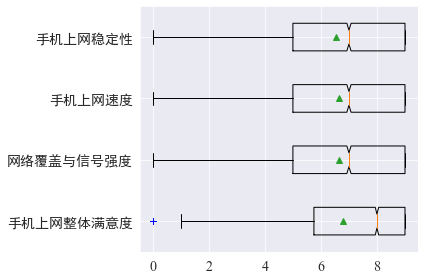

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

box_data = dataTwo[['手机上网整体满意度',
                    '网络覆盖与信号强度',
                    '手机上网速度',
                    '手机上网稳定性',]]
plt.grid(True)
plt.boxplot(box_data,
            notch = True,
            sym = "b+",
            vert = False,
            showmeans = True,
            labels = ['手机上网整体满意度',
                      '网络覆盖与信号强度',
                      '手机上网速度',
                      '手机上网稳定性',])
plt.yticks(size=14)
plt.xticks(size=14, font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2][手机上网整体满意度、网络覆盖与信号强度、手机上网速度、手机上网稳定性]评分箱线图.pdf')

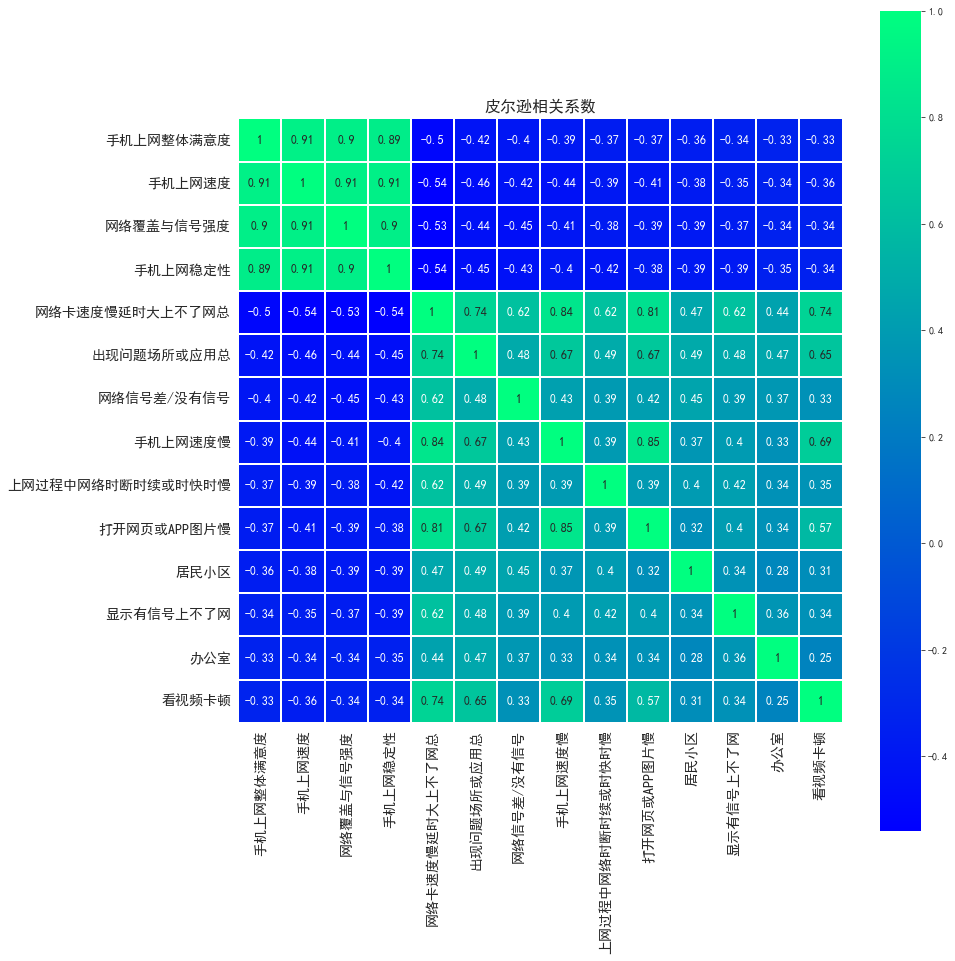

In [19]:
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False
CorrDataTwoAll = dataTwo.corr().abs()
N = 14
ColDataTwoRange = CorrDataTwoAll.nlargest(N,'手机上网整体满意度')['手机上网整体满意度'].index
plt.subplots(figsize = (N, N))
plt.title('皮尔逊相关系数', size=16)
sns.heatmap(dataTwo[ColDataTwoRange].corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=plt.cm.winter,
            linecolor='white',
            annot=True,
            annot_kws={"size":12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]皮尔逊相关系数（14个）.pdf')

<AxesSubplot:title={'center':'RadViz for 6 Features'}>

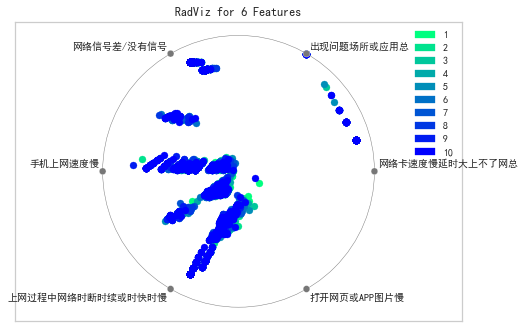

In [20]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataTwo[['网络卡速度慢延时大上不了网总','出现问题场所或应用总','网络信号差/没有信号','手机上网速度慢',
           '上网过程中网络时断时续或时快时慢','打开网页或APP图片慢']]
y=dataTwo['手机上网整体满意度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresTwo\\[附件2]手机上网整体满意度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 6 Features'}>

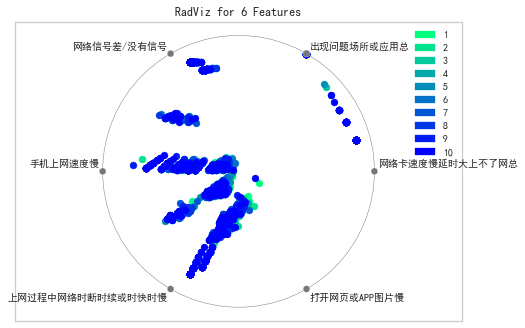

In [21]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataTwo[['网络卡速度慢延时大上不了网总','出现问题场所或应用总','网络信号差/没有信号','手机上网速度慢',
           '上网过程中网络时断时续或时快时慢','打开网页或APP图片慢']]
y=dataTwo['网络覆盖与信号强度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresTwo\\[附件2]网络覆盖与信号强度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 6 Features'}>

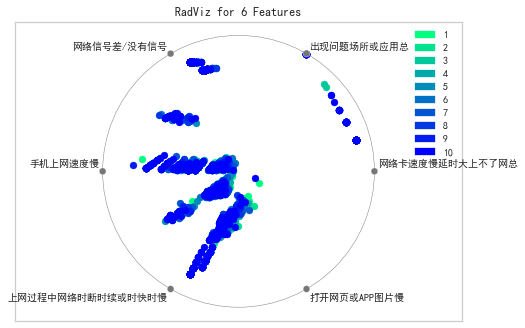

In [22]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataTwo[['网络卡速度慢延时大上不了网总','出现问题场所或应用总','网络信号差/没有信号','手机上网速度慢',
           '上网过程中网络时断时续或时快时慢','打开网页或APP图片慢']]
y=dataTwo['手机上网速度']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresTwo\\[附件2]手机上网速度RidViz.pdf')

<AxesSubplot:title={'center':'RadViz for 6 Features'}>

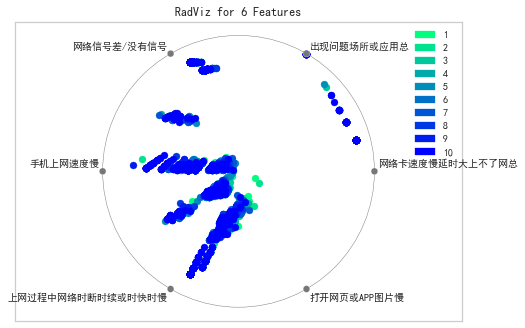

In [23]:
from yellowbrick.features.radviz import RadViz
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

x=dataTwo[['网络卡速度慢延时大上不了网总','出现问题场所或应用总','网络信号差/没有信号','手机上网速度慢',
           '上网过程中网络时断时续或时快时慢','打开网页或APP图片慢']]
y=dataTwo['手机上网稳定性']

classes = ['1','2','3','4','5','6','7','8','9','10']
visualizer = RadViz(classes=classes, colormap='winter_r')
visualizer.fit(x, y)
visualizer.transform(x)
visualizer.show(outpath='figuresTwo\\[附件2]手机上网稳定性RidViz.pdf')

### 数据标准化

In [24]:
StandardTransform = dataTwo[['上网质差次数','当月MOU','客户星级标识','脱网次数',
                             '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                             '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总']]
StandardTransformScaler = sp.StandardScaler()
StandardTransformScaler = StandardTransformScaler.fit(StandardTransform)
StandardTransform = StandardTransformScaler.transform(StandardTransform)
StandardTransform = pd.DataFrame(StandardTransform)
StandardTransform.columns = ['上网质差次数','当月MOU','客户星级标识','脱网次数',
                             '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                             '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总']
StandardTransform

,上网质差次数,当月MOU,客户星级标识,脱网次数,性别,套外流量费（元）,微信质差次数,套外流量（MB）,终端品牌,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,-0.155826,-0.576414,-1.989821,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,0.392889,-0.736922,-0.851445,-0.245349
1,-0.155826,-0.269781,-3.987754,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,1.642000,-0.245349
2,-0.155826,-0.181429,-1.989821,0.014136,-0.317394,-0.189965,-0.194614,-0.09203,-0.635862,1.380883,0.929587,-0.245349
3,-0.155826,4.298525,-1.989821,-0.138453,0.763162,-0.189965,3.525274,-0.09203,-0.635862,-0.434378,-0.495239,2.727293
4,-0.155826,-0.669963,-2.988787,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.635862,-0.131835,-0.139032,0.349180
...,...,...,...,...,...,...,...,...,...,...,...,...
7015,0.531728,0.262928,0.008111,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.121486,-0.736922,-0.851445,0.745532
7016,-0.155826,-0.176232,0.008111,0.039567,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,-0.139032,-0.245349
7017,0.187951,0.437033,0.008111,0.573629,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.736922,-0.851445,-0.047173
7018,0.187951,0.301907,0.008111,-0.087590,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,1.683426,1.285794,-0.047173


In [25]:
dataTwoLeave=dataTwo.loc[:,~dataTwo.columns.isin(['上网质差次数','当月MOU','客户星级标识','脱网次数',
                                                  '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                                                  '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总'])]

In [26]:
dataTwoNewStandard=pd.concat([dataTwoLeave, StandardTransform], axis=1)
dataTwoNewStandard

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,客户星级标识,脱网次数,性别,套外流量费（元）,微信质差次数,套外流量（MB）,终端品牌,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,7,6,6,6,0,0,0,0,0,0,...,-1.989821,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,0.392889,-0.736922,-0.851445,-0.245349
1,8,8,7,8,0,0,0,0,0,0,...,-3.987754,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,1.642000,-0.245349
2,3,2,2,2,1,0,1,0,0,0,...,-1.989821,0.014136,-0.317394,-0.189965,-0.194614,-0.09203,-0.635862,1.380883,0.929587,-0.245349
3,8,7,7,6,0,0,0,0,0,0,...,-1.989821,-0.138453,0.763162,-0.189965,3.525274,-0.09203,-0.635862,-0.434378,-0.495239,2.727293
4,9,9,9,9,1,0,1,0,0,0,...,-2.988787,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.635862,-0.131835,-0.139032,0.349180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0.008111,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.121486,-0.736922,-0.851445,0.745532
7016,8,8,8,8,0,0,0,0,0,0,...,0.008111,0.039567,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,-0.139032,-0.245349
7017,9,9,9,9,0,0,0,0,0,0,...,0.008111,0.573629,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.736922,-0.851445,-0.047173
7018,4,4,4,4,1,0,0,0,0,0,...,0.008111,-0.087590,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,1.683426,1.285794,-0.047173


## 熵权法

In [27]:
import copy
def ewm(data):
    label_need = data.keys()[:]
    data1 = data[label_need].values
    data2 = data1
    [m, n] = data2.shape
    data3 = copy.deepcopy(data2)
    y_min = 0.002
    y_max = 1
    for j in range(0, n):
        d_max = max(data2[:, j])
        d_min = min(data2[:, j])
        data3[:, j] = (y_max - y_min) * (data2[:, j] - d_min) / (d_max - d_min) + y_min
    p = copy.deepcopy(data3)
    for j in range(0, n):
        p[:, j] = data3[:, j] / sum(data3[:, j])
    e = copy.deepcopy(data3[0, :])
    for j in range(0, n):
        e[j] = -1 / np.log(m) * sum(p[:, j] * np.log(p[:, j]))
    w = (1 - e) / sum(1 - e)
    total = 0
    for sum_w in range(0, len(w)):
        total = total + w[sum_w]
    print(f'权重为：{w}\n权重之和为：{total}')

In [28]:
ewm(dataTwo.iloc[:,4:])

权重为：[0.00657056 0.00544721 0.02015649 0.01323089 0.02384065 0.02336125
 0.01792068 0.02064954 0.00758766 0.02004477 0.0172145  0.02383361
 0.00796635 0.01874953 0.00973729 0.01030696 0.02202706 0.00407898
 0.02382206 0.00025856 0.02321949 0.01956664 0.01270158 0.02314121
 0.00873505 0.00279036 0.01183101 0.01322443 0.02357533 0.01641471
 0.00723959 0.01658843 0.01041451 0.02292887 0.01595506 0.01356179
 0.02051073 0.0207374  0.01890339 0.02283036 0.0138734  0.01117025
 0.00154746 0.01639248 0.02031263 0.01747843 0.0064832  0.02346408
 0.00814633 0.00914427 0.02061464 0.02337879 0.01817631 0.01834913
 0.01289007 0.01747843 0.02068458 0.0154963  0.02309649 0.01320507
 0.02009065 0.02384357 0.00563155 0.00492663 0.00472971 0.00772101]
权重之和为：0.9999999999999998


## 灰色关联

In [29]:
def grey(data):
    label_need = data.keys()[:]
    data1 = data[label_need].values
    [m, n] = data1.shape
    data2 = data1.astype('float')
    data3 = data2
    ymin = 0.002
    ymax = 1
    for j in range(0, n):
        d_max = max(data2[:, j])
        d_min = min(data2[:, j])
        data3[:, j] = (ymax - ymin) * (data2[:, j] - d_min) / (d_max - d_min) + ymin

    for i in range(0, n):
        data3[:, i] = np.abs(data3[:, i] - data3[:, 0])
    data4 = data3
    d_max = np.max(data4)
    d_min = np.min(data4)
    a = 0.5
    data4 = (d_min + a * d_max) / (data4 + a * d_max)
    xs = np.mean(data4, axis=0)
    print(xs)

In [30]:
grey(dataTwo.loc[:,~dataTwo.columns.isin(['网络覆盖与信号强度','手机上网速度','手机上网稳定性'])])
grey(dataTwo.loc[:,~dataTwo.columns.isin(['手机上网整体满意度','手机上网速度','手机上网稳定性'])])
grey(dataTwo.loc[:,~dataTwo.columns.isin(['手机上网整体满意度','网络覆盖与信号强度','手机上网速度'])])
grey(dataTwo.loc[:,~dataTwo.columns.isin(['手机上网整体满意度','网络覆盖与信号强度','手机上网稳定性'])])

[1.         0.7421764  0.69639278 0.96892336 0.90397669 0.98931359
 0.98506563 0.99450555 0.97166093 0.77776491 0.99393915 0.94853312
 0.98950239 0.78975362 0.96014423 0.83799162 0.98925424 0.99299516
 0.91017347 0.98969119 0.50939198 0.99176797 0.96543059 0.89595275
 0.98393283 0.99093184 0.55789034 0.98648887 0.90388229 0.98629282
 0.94145318 0.9898758  0.94305797 0.9929365  0.98289444 0.93701642
 0.90869665 0.97090574 0.97213293 0.96118262 0.98242245 0.91294461
 0.86904897 0.88136497 0.99478875 0.99384475 0.95070431 0.73887243
 0.98563202 0.79522877 0.82317094 0.97147214 0.98516002 0.95608506
 0.99441115 0.89887913 0.95070431 0.97184973 0.93229646 0.99195677
 0.90359909 0.96854576 0.98912479 0.70441671 0.88857144 0.78005536
 0.98643416]
[1.         0.7421764  0.69639278 0.96892336 0.90397669 0.98931359
 0.98506563 0.99450555 0.97166093 0.77776491 0.99393915 0.94853312
 0.98950239 0.78975362 0.96014423 0.83799162 0.98925424 0.99299516
 0.91017347 0.98969119 0.50939198 0.99176797 0.96

## 机器学习

### 多输出多类别分类

In [31]:
XdataTwoMulti=dataTwoNewStandard.loc[:,~dataTwoNewStandard.columns.isin(['手机上网整体满意度','网络覆盖与信号强度',
                                                                         '手机上网速度','手机上网稳定性'])]
ydataTwoMulti=dataTwoNewStandard[['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性']]

In [32]:
from sklearn.model_selection import train_test_split
XdataTwoMulti_train, XdataTwoMulti_test, ydataTwoMulti_train, ydataTwoMulti_test = train_test_split(XdataTwoMulti, ydataTwoMulti, test_size=0.2, random_state=2022)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DecisionTreeMulti = DecisionTreeClassifier(random_state=2022)
RandomForestMulti = RandomForestClassifier(random_state=2022)
DecisionTreeMulti = DecisionTreeMulti.fit(XdataTwoMulti_train, ydataTwoMulti_train)
RandomForestMulti = RandomForestMulti.fit(XdataTwoMulti_train, ydataTwoMulti_train)

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'决策树平均绝对误差：'
      f'{mean_absolute_error(ydataTwoMulti_test, DecisionTreeMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'决策树均方误差：'
      f'{mean_squared_error(ydataTwoMulti_test, DecisionTreeMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}')
print(f'随机森林平均绝对误差：'
      f'{mean_absolute_error(ydataTwoMulti_test, RandomForestMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'随机森林均方误差：'
      f'{mean_squared_error(ydataTwoMulti_test, RandomForestMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}')

决策树平均绝对误差：2.1340811965811968
决策树均方误差：9.590633903133902
随机森林平均绝对误差：1.821403133903134
随机森林均方误差：7.840277777777778


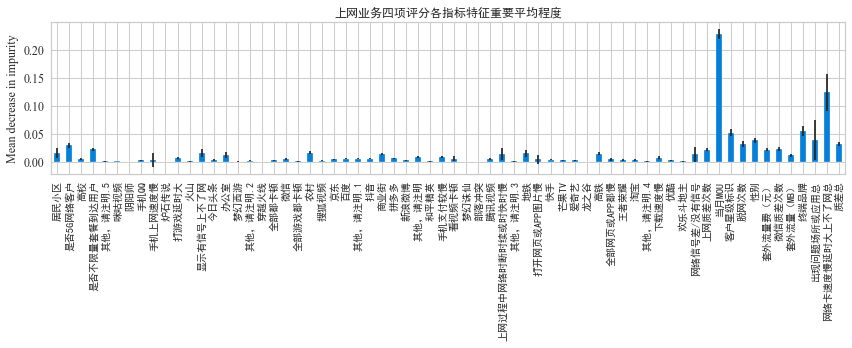

In [35]:
std = np.std([i.feature_importances_ for i in RandomForestMulti.estimators_], axis=0)
importances = DecisionTreeMulti.feature_importances_
feat_with_importance = pd.Series(importances, XdataTwoMulti.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,127/255,215/255))
ax.set_title("上网业务四项评分各指标特征重要平均程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]上网业务四项评分各指标特征重要平均程度.pdf')

In [36]:
feat_with_importance

居民小区              0.016119
是否5G网络客户          0.029553
高校                0.005057
是否不限量套餐到达用户       0.022563
其他，请注明.5          0.001279
                    ...   
套外流量（MB）          0.011928
终端品牌              0.055118
出现问题场所或应用总        0.039351
网络卡速度慢延时大上不了网总    0.124415
质差总               0.031682
Length: 66, dtype: float64

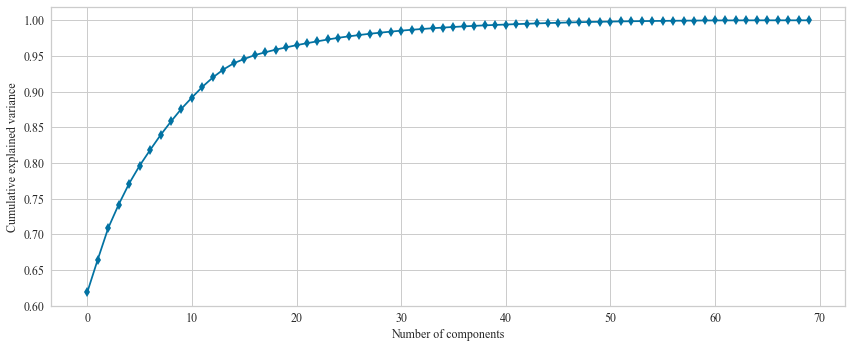

In [37]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dataTwoNewStandard)
evr = pca.explained_variance_ratio_

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="d", linestyle="-")
plt.xlabel("Number of components",font='Times New Roman')
plt.ylabel("Cumulative explained variance",font='Times New Roman')
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresTwo\\[附件2]PCA累计解释方差图.pdf")

In [38]:
from sklearn.multioutput import MultiOutputClassifier
RandomForestMulti = MultiOutputClassifier(RandomForestClassifier(random_state=2022))
RandomForestMulti = RandomForestMulti.fit(XdataTwoMulti_train, ydataTwoMulti_train)
RandomForestMulti_score = RandomForestMulti.score(XdataTwoMulti_test, ydataTwoMulti_test)
print(f'随机森林平均绝对误差：'
      f'{mean_absolute_error(ydataTwoMulti_test, RandomForestMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'随机森林均方误差：'
      f'{mean_squared_error(ydataTwoMulti_test, RandomForestMulti.predict(XdataTwoMulti_test), sample_weight=None, multioutput="uniform_average")}')
RandomForestMulti_score

随机森林平均绝对误差：1.8338675213675213
随机森林均方误差：8.008368945868947


0.19943019943019943

### "手机上网整体满意度"学习

In [39]:
XdataTwoFirst=dataTwoNewStandard.loc[:,~dataTwoNewStandard.columns.isin(['手机上网整体满意度','网络覆盖与信号强度',
                                                                         '手机上网速度','手机上网稳定性'])]
ydataTwoFirst=dataTwoNewStandard['手机上网整体满意度']
XdataTwoFirst_train, XdataTwoFirst_test, ydataTwoFirst_train, ydataTwoFirst_test = train_test_split(XdataTwoFirst, ydataTwoFirst, test_size=0.1, random_state=2022)

#### 决策树、随机森林

In [40]:
DecisionTreeFirst = DecisionTreeClassifier(random_state=2022, min_samples_leaf=16)
RandomForestFirst = RandomForestClassifier(random_state=2022, n_estimators=166, min_samples_leaf=16)
DecisionTreeFirst = DecisionTreeFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
RandomForestFirst = RandomForestFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
RandomForestFirst_score = RandomForestFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
RandomForestFirst_score

0.4458689458689459

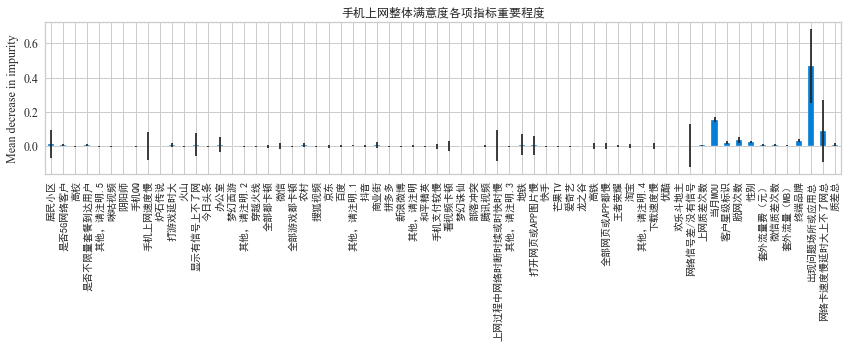

In [41]:
std = np.std([i.feature_importances_ for i in RandomForestFirst.estimators_], axis=0)
importances = DecisionTreeFirst.feature_importances_
feat_with_importance = pd.Series(importances, XdataTwoFirst.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("手机上网整体满意度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresTwo\\[附件2]手机上网整体满意度各项指标重要程度.pdf")

In [42]:
feat_with_importance

居民小区              0.013838
是否5G网络客户          0.009192
高校                0.000000
是否不限量套餐到达用户       0.007765
其他，请注明.5          0.000000
                    ...   
套外流量（MB）          0.002860
终端品牌              0.033240
出现问题场所或应用总        0.467841
网络卡速度慢延时大上不了网总    0.089909
质差总               0.010741
Length: 66, dtype: float64

#### XGBoost

In [43]:
from xgboost import XGBClassifier

XGBFirst = XGBClassifier(learning_rate=0.01,
                         n_estimators=17,
                         max_depth=3,
                         min_child_weight=1,
                         gamma=0.,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
XGBFirst_score = XGBFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
XGBFirst_score

[14:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.4358974358974359

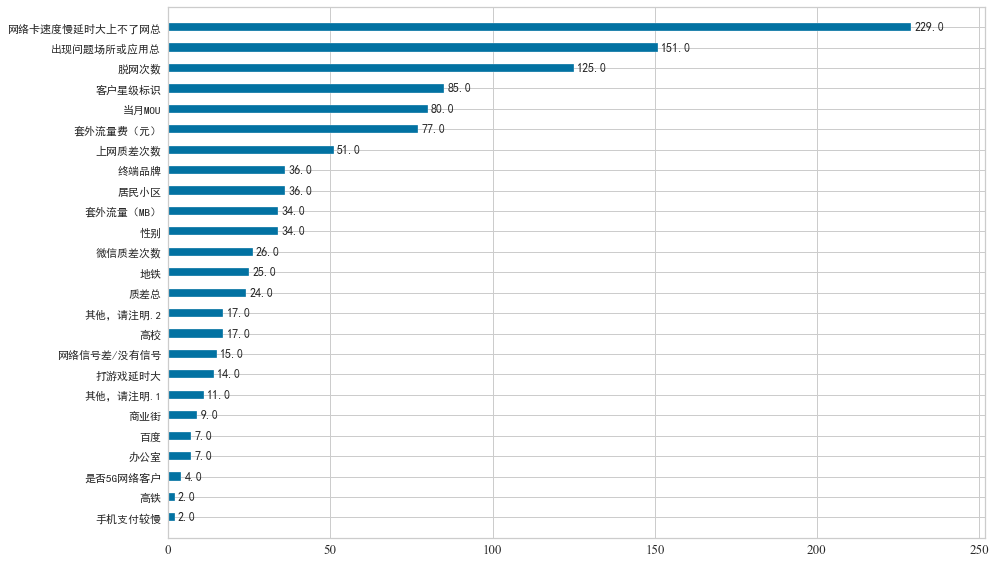

In [44]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBFirst, height=0.4, ax=ax)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]手机上网整体满意度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

KNNFirst = KNeighborsClassifier(n_neighbors=36, p=1, weights='distance')
KNNFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
KNNFirst_score = KNNFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
KNNFirst_score

0.42165242165242167

#### 支持向量机

In [46]:
from sklearn.svm import SVC

SVMFirst = SVC(random_state=2022)
SVMFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
SVMFirst_score = SVMFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
SVMFirst_score

0.43304843304843305

#### lightgbm

In [47]:
from lightgbm import LGBMClassifier
LightgbmFirst = LGBMClassifier(learning_rate = 0.1,
                               lambda_l1=0.1,
                               lambda_l2=0.2,
                               max_depth=1,
                               objective='multiclass',
                               num_class=3,
                               random_state=2022)
LightgbmFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
LightgbmFirst_score = LightgbmFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
LightgbmFirst_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.4444444444444444

#### 逻辑回归

In [48]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFirst = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionFirst = LogisticRegressionFirst.fit(XdataTwoFirst_train, ydataTwoFirst_train)
LogisticRegressionFirst_score = LogisticRegressionFirst.score(XdataTwoFirst_test, ydataTwoFirst_test)
LogisticRegressionFirst_score

0.4301994301994302

In [49]:
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, RandomForestFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, RandomForestFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, XGBFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, XGBFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, KNNFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, KNNFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, SVMFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, SVMFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, LightgbmFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, LightgbmFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, LogisticRegressionFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, LogisticRegressionFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一中RF平均绝对误差：1.7692307692307692
模型一中RF均方误差：8.675213675213675
模型一中XGBoost平均绝对误差：1.7222222222222223
模型一中XGBoost均方误差：8.226495726495726
模型一中KNN平均绝对误差：1.8148148148148149
模型一中KNN均方误差：8.626780626780628
模型一中SVM平均绝对误差：1.8575498575498575
模型一中SVM均方误差：9.384615384615385
模型一中LightGBM平均绝对误差：1.7122507122507122
模型一中LightGBM均方误差：8.185185185185185
模型一中LR平均绝对误差：1.7820512820512822
模型一中LR均方误差：8.736467236467236


#### 集成学习

In [50]:
from mlxtend.classifier import StackingCVClassifier
FirstModel = StackingCVClassifier(classifiers=[LogisticRegressionFirst,XGBFirst,KNNFirst,RandomForestFirst,LightgbmFirst], meta_classifier=SVC(random_state=2022), random_state=2022, cv=5)
FirstModel.fit(XdataTwoFirst_train, ydataTwoFirst_train)
FirstModel_score = FirstModel.score(XdataTwoFirst_test, ydataTwoFirst_test)
FirstModel_score

[14:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.4358974358974359

In [51]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, FirstModel.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, FirstModel.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.7094017094017093
模型一均方误差：8.068376068376068


### "网络覆盖与信号强度"学习

In [52]:
XdataTwoSecond=dataTwoNewStandard.loc[:,~dataTwoNewStandard.columns.isin(['手机上网整体满意度','网络覆盖与信号强度',
                                                                          '手机上网速度','手机上网稳定性'])]
ydataTwoSecond=dataTwoNewStandard['网络覆盖与信号强度']
XdataTwoSecond_train, XdataTwoSecond_test, ydataTwoSecond_train, ydataTwoSecond_test = train_test_split(XdataTwoSecond, ydataTwoSecond, test_size=0.1, random_state=2022)

#### 决策树、随机森林

In [53]:
DecisionTreeSecond = DecisionTreeClassifier(random_state=2022)
RandomForestSecond = RandomForestClassifier(random_state=2022, n_estimators=159, min_samples_leaf=20)
DecisionTreeSecond = DecisionTreeSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
RandomForestSecond = RandomForestSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
RandomForestSecond_score = RandomForestSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
RandomForestSecond_score

0.3903133903133903

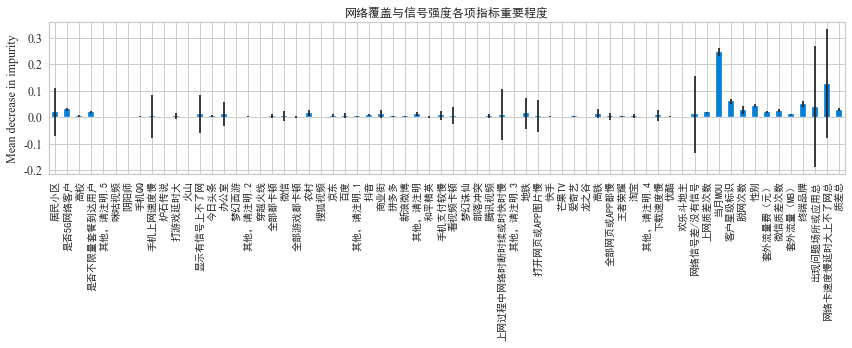

In [54]:
std = np.std([i.feature_importances_ for i in RandomForestSecond.estimators_], axis=0)
importances = DecisionTreeSecond.feature_importances_
feat_with_importance = pd.Series(importances, XdataTwoSecond.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("网络覆盖与信号强度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresTwo\\[附件2]网络覆盖与信号强度各项指标重要程度.pdf")

In [55]:
feat_with_importance

居民小区              0.018490
是否5G网络客户          0.030113
高校                0.004633
是否不限量套餐到达用户       0.018250
其他，请注明.5          0.001136
                    ...   
套外流量（MB）          0.010714
终端品牌              0.048447
出现问题场所或应用总        0.040224
网络卡速度慢延时大上不了网总    0.125912
质差总               0.028929
Length: 66, dtype: float64

#### XGBoost

In [56]:
from xgboost import XGBClassifier

XGBSecond = XGBClassifier(learning_rate=0.02,
                          n_estimators=17,
                          max_depth=6,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
XGBSecond_score = XGBSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
XGBSecond_score

[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.37749287749287747

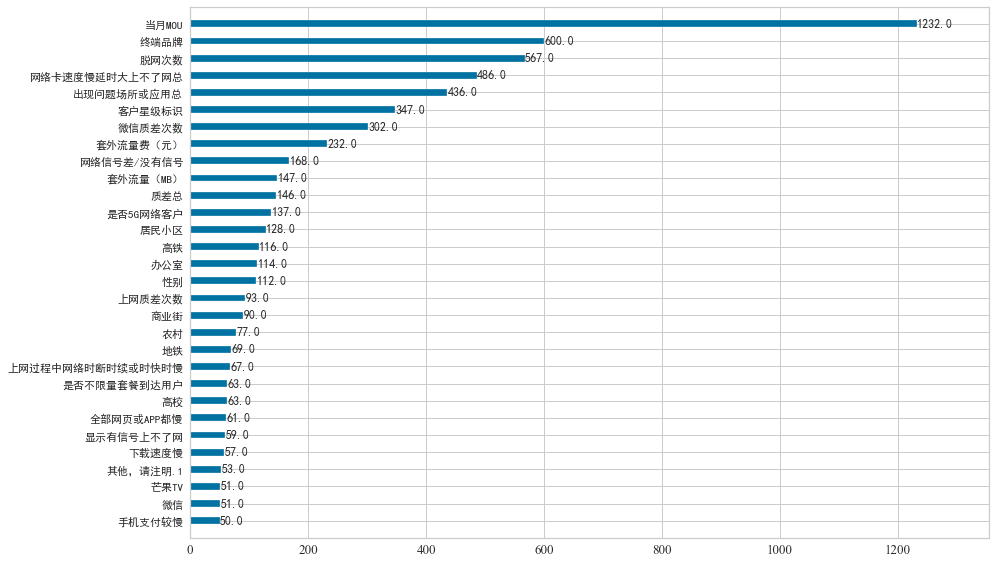

In [57]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBSecond, height=0.4, ax=ax, max_num_features=30)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]网络覆盖与信号强度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

KNNSecond = KNeighborsClassifier(algorithm='auto', leaf_size=42,
                                 metric='minkowski',
                                 n_jobs=-1,
                                 n_neighbors=46, p=1,
                                 weights='distance')
KNNSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
KNNSecond_score = KNNSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
KNNSecond_score

0.3945868945868946

#### 支持向量机

In [59]:
from sklearn.svm import SVC

SVMSecond = SVC(random_state=2022)
SVMSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
SVMSecond_score = SVMSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
SVMSecond_score

0.396011396011396

#### lightgbm

In [60]:
from lightgbm import LGBMClassifier
LightgbmSecond = LGBMClassifier(learning_rate=0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=5,
                                objective='multiclass',
                                num_class=3,
                                random_state=2022)
LightgbmSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
LightgbmSecond_score = LightgbmSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
LightgbmSecond_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.38461538461538464

#### 逻辑回归

In [61]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionSecond = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=3000)
LogisticRegressionSecond = LogisticRegressionSecond.fit(XdataTwoSecond_train, ydataTwoSecond_train)
LogisticRegressionSecond_score = LogisticRegressionSecond.score(XdataTwoSecond_test, ydataTwoSecond_test)
LogisticRegressionSecond_score

0.3717948717948718

In [62]:
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, RandomForestSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, RandomForestSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, XGBSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, XGBSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, KNNSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, KNNSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, SVMSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, SVMSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, LightgbmSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, LightgbmSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, LogisticRegressionSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, LogisticRegressionSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二中RF平均绝对误差：1.7321937321937322
模型二中RF均方误差：7.521367521367521
模型二中XGBoost平均绝对误差：1.7863247863247864
模型二中XGBoost均方误差：7.877492877492878
模型二中KNN平均绝对误差：1.7792022792022792
模型二中KNN均方误差：8.027065527065528
模型二中SVM平均绝对误差：1.8504273504273505
模型二中SVM均方误差：8.696581196581196
模型二中LightGBM平均绝对误差：1.7393162393162394
模型二中LightGBM均方误差：7.477207977207978
模型二中LR平均绝对误差：1.8547008547008548
模型二中LR均方误差：8.452991452991453


#### 集成学习

In [63]:
from mlxtend.classifier import StackingCVClassifier
SecondModel = StackingCVClassifier(classifiers=[RandomForestSecond,XGBSecond,KNNSecond,LogisticRegressionSecond,LightgbmSecond], meta_classifier=SVC(random_state=2022), random_state=2022, cv=5)
SecondModel.fit(XdataTwoSecond_train, ydataTwoSecond_train)
SecondModel_score = SecondModel.score(XdataTwoSecond_test, ydataTwoSecond_test)
SecondModel_score

[14:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.3803418803418803

In [64]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, SecondModel.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, SecondModel.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.764957264957265
模型二均方误差：7.7763532763532766


### "手机上网速度"学习

In [65]:
XdataTwoThird=dataTwoNewStandard.loc[:,~dataTwoNewStandard.columns.isin(['手机上网整体满意度','网络覆盖与信号强度',
                                                                         '手机上网速度','手机上网稳定性'])]
ydataTwoThird=dataTwoNewStandard['手机上网速度']
XdataTwoThird_train, XdataTwoThird_test, ydataTwoThird_train, ydataTwoThird_test = train_test_split(XdataTwoThird, ydataTwoThird, test_size=0.1, random_state=2022)

#### 决策树、随机森林

In [66]:
DecisionTreeThird = DecisionTreeClassifier(random_state=2022)
RandomForestThird = RandomForestClassifier(random_state=2022, n_estimators=162, min_samples_leaf=20)
DecisionTreeThird = DecisionTreeThird.fit(XdataTwoThird_train, ydataTwoThird_train)
RandomForestThird = RandomForestThird.fit(XdataTwoThird_train, ydataTwoThird_train)
RandomForestThird_score = RandomForestThird.score(XdataTwoThird_test, ydataTwoThird_test)
RandomForestThird_score

0.37749287749287747

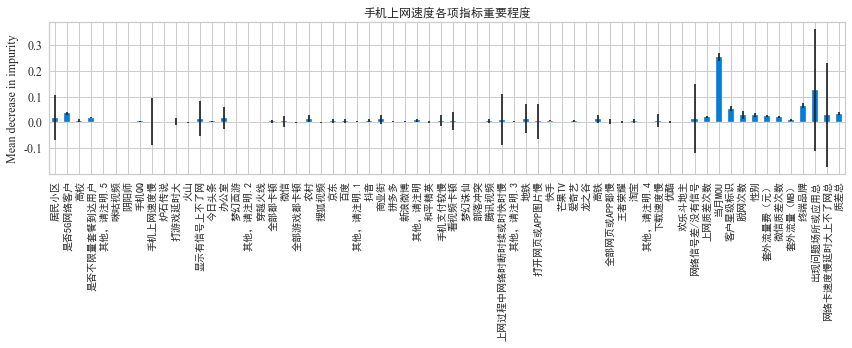

In [67]:
std = np.std([i.feature_importances_ for i in RandomForestThird.estimators_], axis=0)
importances = DecisionTreeThird.feature_importances_
feat_with_importance = pd.Series(importances, XdataTwoThird.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("手机上网速度各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresTwo\\[附件2]手机上网速度各项指标重要程度.pdf")

In [68]:
feat_with_importance

居民小区              0.018487
是否5G网络客户          0.034991
高校                0.006339
是否不限量套餐到达用户       0.018884
其他，请注明.5          0.001598
                    ...   
套外流量（MB）          0.008930
终端品牌              0.064284
出现问题场所或应用总        0.125799
网络卡速度慢延时大上不了网总    0.029199
质差总               0.033367
Length: 66, dtype: float64

#### XGBoost

In [69]:
from xgboost import XGBClassifier

XGBThird = XGBClassifier(learning_rate=0.02,
                         n_estimators=16,
                         max_depth=8,
                         min_child_weight=1,
                         gamma=0.05,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBThird.fit(XdataTwoThird_train, ydataTwoThird_train)
XGBThird_score = XGBThird.score(XdataTwoThird_test, ydataTwoThird_test)
XGBThird_score

[15:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.35327635327635326

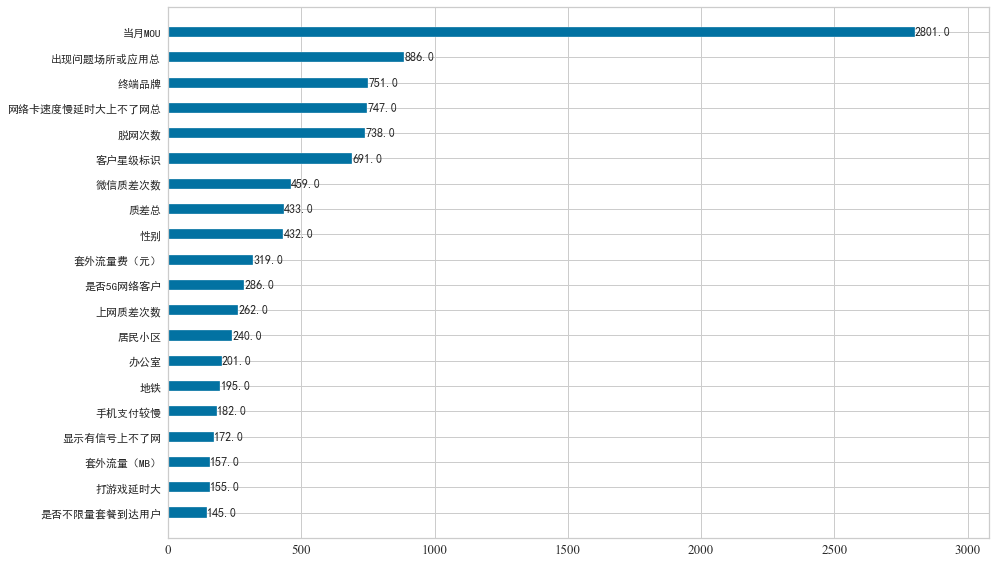

In [70]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBThird, height=0.4, ax=ax, max_num_features=20)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]手机上网速度各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNNThird = KNeighborsClassifier(n_neighbors=35, p=1)
KNNThird.fit(XdataTwoThird_train, ydataTwoThird_train)
KNNThird_score = KNNThird.score(XdataTwoThird_test, ydataTwoThird_test)
KNNThird_score

0.3817663817663818

#### 支持向量机

In [72]:
from sklearn.svm import SVC

SVMThird = SVC(random_state=2022)
SVMThird.fit(XdataTwoThird_train, ydataTwoThird_train)
SVMThird_score = SVMThird.score(XdataTwoThird_test, ydataTwoThird_test)
SVMThird_score

0.3732193732193732

#### lightgbm

In [73]:
LightgbmThird = LGBMClassifier(learning_rate = 0.1,
                               lambda_l1=0.1,
                               lambda_l2=0.2,
                               max_depth=16,
                               objective='multiclass',
                               num_class=4,
                               random_state=2022)
LightgbmThird.fit(XdataTwoThird_train, ydataTwoThird_train)
LightgbmThird_score = LightgbmThird.score(XdataTwoThird_test, ydataTwoThird_test)
LightgbmThird_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.37037037037037035

#### 逻辑回归

In [74]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionThird = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionThird = LogisticRegressionThird.fit(XdataTwoThird_train, ydataTwoThird_train)
LogisticRegressionThird_score = LogisticRegressionThird.score(XdataTwoThird_test, ydataTwoThird_test)
LogisticRegressionThird_score

0.37606837606837606

In [75]:
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, RandomForestThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, RandomForestThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, XGBThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, XGBThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, KNNThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, KNNThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, SVMThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, SVMThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, LightgbmThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, LightgbmThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, LogisticRegressionThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, LogisticRegressionThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三中RF平均绝对误差：1.789173789173789
模型三中RF均方误差：7.766381766381766
模型三中XGBoost平均绝对误差：1.7222222222222223
模型三中XGBoost均方误差：6.9586894586894585
模型三中KNN平均绝对误差：1.7806267806267806
模型三中KNN均方误差：7.7094017094017095
模型三中SVM平均绝对误差：1.8518518518518519
模型三中SVM均方误差：8.507122507122507
模型三中LightGBM平均绝对误差：1.7222222222222223
模型三中LightGBM均方误差：7.246438746438747
模型三中LR平均绝对误差：1.8219373219373218
模型三中LR均方误差：8.084045584045585


#### 集成学习

In [76]:
from mlxtend.classifier import StackingCVClassifier
ThirdModel = StackingCVClassifier(classifiers=[XGBThird,LightgbmThird,KNNThird,RandomForestThird,LogisticRegressionThird], meta_classifier=SVC(random_state=2022), random_state=2022, cv=5)
ThirdModel.fit(XdataTwoThird_train, ydataTwoThird_train)
ThirdModel_score = ThirdModel.score(XdataTwoThird_test, ydataTwoThird_test)
ThirdModel_score

[15:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.37606837606837606

In [77]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, ThirdModel.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, ThirdModel.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.7207977207977208
模型三均方误差：7.313390313390314


### "手机上网稳定性"学习

In [78]:
XdataTwoFourth=dataTwoNewStandard.loc[:,~dataTwoNewStandard.columns.isin(['手机上网整体满意度','网络覆盖与信号强度',
                                                                          '手机上网速度','手机上网稳定性'])]
ydataTwoFourth=dataTwoNewStandard['手机上网稳定性']
XdataTwoFourth_train, XdataTwoFourth_test, ydataTwoFourth_train, ydataTwoFourth_test = train_test_split(XdataTwoFourth, ydataTwoFourth, test_size=0.1, random_state=2022)

#### 决策树、随机森林

In [79]:
DecisionTreeFourth = DecisionTreeClassifier(random_state=2022)
RandomForestFourth = RandomForestClassifier(random_state=2022, n_estimators=166, min_samples_leaf=20)
DecisionTreeFourth = DecisionTreeFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
RandomForestFourth = RandomForestFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
RandomForestFourth_score = RandomForestFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
RandomForestFourth_score

0.3803418803418803

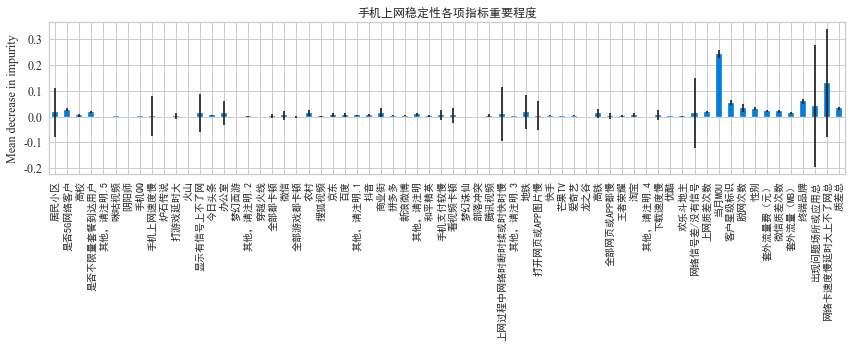

In [80]:
std = np.std([i.feature_importances_ for i in RandomForestFourth.estimators_], axis=0)
importances = DecisionTreeFourth.feature_importances_
feat_with_importance = pd.Series(importances, XdataTwoFourth.columns)
fig, ax = plt.subplots(figsize=(12,5))
feat_with_importance.plot.bar(yerr=std, ax=ax, color=(5/255,126/255,215/255))
ax.set_title("手机上网稳定性各项指标重要程度")
ax.set_ylabel("Mean decrease in impurity",font='Times New Roman')
plt.yticks(font='Times New Roman')
plt.tight_layout()
plt.savefig("figuresTwo\\[附件2]手机上网稳定性各项指标重要程度.pdf")

In [81]:
feat_with_importance

居民小区              0.017033
是否5G网络客户          0.026712
高校                0.005192
是否不限量套餐到达用户       0.017236
其他，请注明.5          0.000435
                    ...   
套外流量（MB）          0.013428
终端品牌              0.059441
出现问题场所或应用总        0.040667
网络卡速度慢延时大上不了网总    0.129482
质差总               0.032997
Length: 66, dtype: float64

#### XGBoost

In [82]:
from xgboost import XGBClassifier

XGBFourth = XGBClassifier(learning_rate=0.02,
                          n_estimators=14,
                          max_depth=8,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
XGBFourth_score = XGBFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
XGBFourth_score

[15:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.3888888888888889

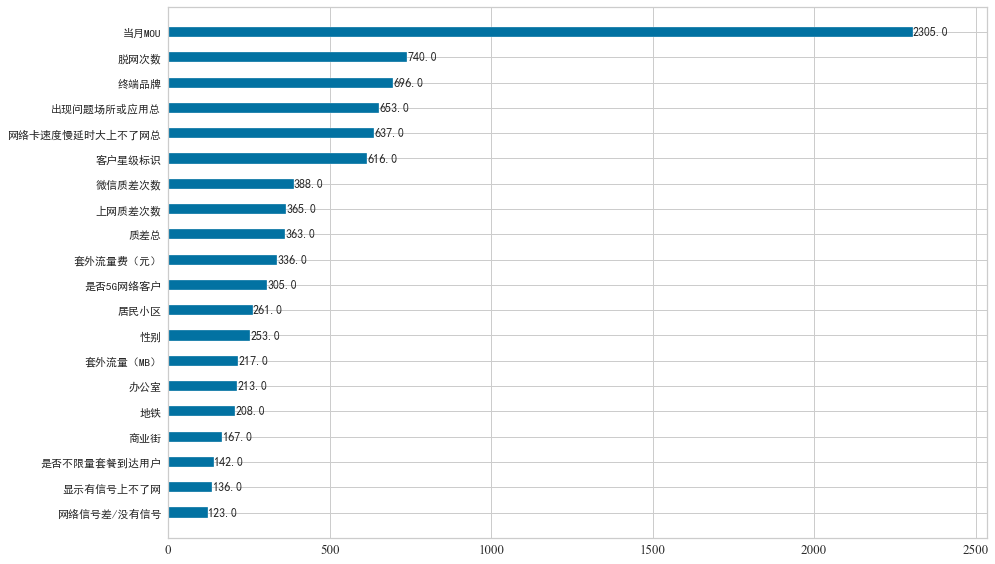

In [83]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(XGBFourth, height=0.4, ax=ax, max_num_features=20)
plt.xticks(fontsize=13, font='Times New Roman')
plt.yticks(fontsize=11)
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2]手机上网稳定性各项指标重要程度（XGBoost,F-score）.pdf')

#### KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

KNNFourth = KNeighborsClassifier(n_neighbors=36, p=1,)
KNNFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
KNNFourth_score = KNNFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
KNNFourth_score

0.3831908831908832

#### 支持向量机

In [85]:
from sklearn.svm import SVC

SVMFourth = SVC(random_state=2022)
SVMFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
SVMFourth_score = SVMFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
SVMFourth_score

0.3817663817663818

#### lightgbm

In [86]:
from lightgbm import LGBMClassifier
LightgbmFourth = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=14,
                                objective='multiclass',
                                num_class=4,
                                random_state=2022)
LightgbmFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
LightgbmFourth_score = LightgbmFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
LightgbmFourth_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.36752136752136755

#### 逻辑回归

In [87]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFourth = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionFourth = LogisticRegressionFourth.fit(XdataTwoFourth_train, ydataTwoFourth_train)
LogisticRegressionFourth_score = LogisticRegressionFourth.score(XdataTwoFourth_test, ydataTwoFourth_test)
LogisticRegressionFourth_score

0.3817663817663818

In [88]:
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, RandomForestFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, RandomForestFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, XGBFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, XGBFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, KNNFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, KNNFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, SVMFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, SVMFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, LightgbmFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, LightgbmFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, LogisticRegressionFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, LogisticRegressionFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四中RF平均绝对误差：1.8347578347578348
模型四中RF均方误差：8.091168091168091
模型四中XGBoost平均绝对误差：1.7792022792022792
模型四中XGBoost均方误差：7.884615384615385
模型四中KNN平均绝对误差：1.7977207977207976
模型四中KNN均方误差：8.105413105413106
模型四中SVM平均绝对误差：1.9259259259259258
模型四中SVM均方误差：9.005698005698006
模型四中LightGBM平均绝对误差：1.8433048433048433
模型四中LightGBM均方误差：8.113960113960115
模型四中LR平均绝对误差：1.8304843304843306
模型四中LR均方误差：8.254985754985755


#### 集成学习

In [89]:
from mlxtend.classifier import StackingCVClassifier
FourthModel = StackingCVClassifier(classifiers=[RandomForestFourth,LightgbmFourth,KNNFourth,LogisticRegressionFourth,XGBFourth], meta_classifier=SVC(random_state=2022), random_state=2022, cv=5)
FourthModel.fit(XdataTwoFourth_train, ydataTwoFourth_train)
FourthModel_score = FourthModel.score(XdataTwoFourth_test, ydataTwoFourth_test)
FourthModel_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ign

0.38746438746438744

In [90]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, FourthModel.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, FourthModel.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.8276353276353277
模型四均方误差：8.08974358974359


## 预测附件4四项评分

### 附件格式统一

In [91]:
dataFour

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,7,-1,-1,3,-1,-1,-1,-1,-1
1,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,-1,-1,3,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1606,1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1607,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,99,-1,-1,-1,-1,-1,-1,1
1608,1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [92]:
dataFour.replace({'居民小区':{-1:0},
                 '是否5G网络客户':{'否':0,'是':1},
                 '高校':{-1:0,3:1},
                 '是否不限量套餐到达用户':{'否':0,'是':1},
                 '其他，请注明.5':{-1:0,98:1},
                 '咪咕视频':{-1:0,9:1},
                 '阴阳师':{-1:0,10:1},
                 '手机QQ':{-1:0,2:1},
                 '手机上网速度慢':{-1:0,4:1},
                 '炉石传说':{-1:0,9:1},
                 '打游戏延时大':{-1:0,2:1},
                 '火山':{-1:0,8:1},
                 '显示有信号上不了网':{-1:0,2:1},
                 '今日头条':{-1:0,6:1},
                 '办公室':{-1:0,2:1},
                 '梦幻西游':{-1:0,4:1},
                 '其他，请注明.2':{-1:0,98:1},
                 '客户星级标识':{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8},
                 '穿越火线':{-1:0,3:1},
                 '全部都卡顿':{-1:0,99:1},
                 '微信':{-1:0},
                 '全部游戏都卡顿':{-1:0,99:1},
                 '性别':{'男':1,'女':-1,'性别不详':0},
                 '农村':{-1:0,6:1},
                 '搜狐视频':{-1:0,5:1},
                 '京东':{-1:0,4:1},
                 '百度':{-1:0,5:1},
                 '其他，请注明.1':{-1:0,98:1},
                 '抖音':{-1:0,6:1},
                 '商业街':{-1:0,4:1},
                 '拼多多':{-1:0,8:1},
                 '新浪微博':{-1:0,7:1},
                 '其他，请注明':{-1:0,98:1},
                 '和平精英':{-1:0},
                 '手机支付较慢':{-1:0,5:1},
                 '看视频卡顿':{-1:0},
                 '梦幻诛仙':{-1:0,6:1},
                 '部落冲突':{-1:0,8:1},
                 '腾讯视频':{-1:0,3:1},
                 '上网过程中网络时断时续或时快时慢':{-1:0,3:1},
                 '其他，请注明.3':{-1:0,98:1},
                 '地铁':{-1:0,5:1},
                 '打开网页或APP图片慢':{-1:0,3:1},
                 '快手':{-1:0,7:1},
                 '芒果TV':{-1:0,4:1},
                 '爱奇艺':{-1:0},
                 '龙之谷':{-1:0,5:1},
                 '高铁':{-1:0,7:1},
                 '全部网页或APP都慢':{-1:0,99:1},
                 '王者荣耀':{-1:0,2:1},
                 '淘宝':{-1:0,3:1},
                 '其他，请注明.4':{-1:0,98:1},
                 '下载速度慢':{-1:0,4:1},
                 '优酷':{-1:0,2:1},
                 '欢乐斗地主':{-1:0,7:1},
                 '网络信号差/没有信号':{-1:0},
                 '终端品牌':{'0':0,'苹果':1,'华为':2,'小米科技':3,
                            '步步高':4,'欧珀':5,'realme':6,'三星':7,
                            '万普拉斯':8,'黑鲨':9,'锤子':10,'摩托罗拉':11,
                            '中邮通信':12,'万普':13,'诺基亚':14,'联通':15,
                            '中国移动':16,'中兴':17,'华硕':18,'联想':19,
                            '魅族':20,'奇酷':21,'TD':22,'北京珠穆朗玛移动通信有限公司':23,
                            '飞利浦':24,'捷开通讯科技':25,'金立':26,'酷比':27,
                            '欧博信':28,'索尼爱立信':29,'维图':30,'甄十信息科技（上海）有限公司':31,
                            '中国电信':32,'天翼':33,'RealMe':6}
                 }, inplace=True)
dataFour

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1607,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
dataFour['出现问题场所或应用总']=dataFour.loc[:,~dataFour.columns.isin(['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性',
                            '是否5G网络客户','是否不限量套餐到达用户','手机上网速度慢','打游戏延时大',
                            '显示有信号上不了网','上网质差次数','当月MOU','客户星级标识',
                            '全部都卡顿','全部游戏都卡顿','脱网次数','性别',
                            '套外流量费（元）','微信质差次数','百度','套外流量（MB）',
                            '手机支付较慢','看视频卡顿','终端品牌','上网过程中网络时断时续或时快时慢',
                            '打开网页或APP图片慢','全部网页或APP都慢','下载速度慢','网络信号差/没有信号'])].apply(lambda x1:x1.sum(), axis=1)
dataFour['网络卡速度慢延时大上不了网总']=dataFour.loc[:,['手机上网速度慢','打游戏延时大','显示有信号上不了网',
                                                '全部都卡顿','全部游戏都卡顿','手机支付较慢','看视频卡顿',
                                                '上网过程中网络时断时续或时快时慢','打开网页或APP图片慢',
                                                '全部网页或APP都慢','下载速度慢','网络信号差/没有信号']].apply(lambda x1:x1.sum(), axis=1)
dataFour['质差总']=dataFour.loc[:,['微信质差次数','上网质差次数']].apply(lambda x1:x1.sum(), axis=1)
dataFour

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,8,4,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1607,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,2,6,0
1608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [94]:
dataFourStandardTransform = dataFour[['上网质差次数','当月MOU','客户星级标识','脱网次数',
                             '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                             '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总']]
dataFourStandardTransformScaler = sp.StandardScaler()
dataFourStandardTransformScaler = dataFourStandardTransformScaler.fit(dataFourStandardTransform)
dataFourStandardTransform = dataFourStandardTransformScaler.transform(dataFourStandardTransform)
dataFourStandardTransform = pd.DataFrame(dataFourStandardTransform)
dataFourStandardTransform.columns = ['上网质差次数','当月MOU','客户星级标识','脱网次数',
                             '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                             '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总']
dataFourStandardTransform

,上网质差次数,当月MOU,客户星级标识,脱网次数,性别,套外流量费（元）,微信质差次数,套外流量（MB）,终端品牌,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,-0.180359,-0.373442,1.061631,-0.409169,-1.393568,-0.150021,-0.253553,-0.056892,0.685627,1.644613,0.693579,-0.287588
1,-0.180359,-0.516260,1.061631,-0.495586,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588
2,-0.180359,-0.596757,0.011093,-0.495586,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.662610,-0.813387,-0.287588
3,-0.180359,-0.285154,0.011093,-0.365960,-1.393568,-0.150021,0.033522,-0.056892,-0.591988,-0.662610,-0.813387,-0.122872
4,-0.180359,-0.396812,0.011093,1.751272,0.764820,-0.150021,-0.253553,-0.056892,0.259755,1.067807,1.447061,-0.287588
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-0.180359,0.109543,1.061631,0.843887,-1.393568,-0.150021,-0.253553,-0.056892,-0.166116,-0.662610,-0.813387,-0.287588
1606,-0.180359,-0.448746,0.011093,-0.495586,-1.393568,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588
1607,-0.180359,-0.170900,-1.039446,-0.279542,0.764820,-0.150021,-0.253553,-0.056892,0.259755,-0.085804,1.447061,-0.287588
1608,-0.180359,-0.404602,1.061631,1.448811,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588


In [95]:
dataFourLeave=dataFour.loc[:,~dataFour.columns.isin(['上网质差次数','当月MOU','客户星级标识','脱网次数',
                                                  '性别','套外流量费（元）','微信质差次数','套外流量（MB）',
                                                  '终端品牌','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总'])]
dataFourNewStandard=pd.concat([dataFourLeave, dataFourStandardTransform],axis=1)
dataFourNewStandard

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,客户星级标识,脱网次数,性别,套外流量费（元）,微信质差次数,套外流量（MB）,终端品牌,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,1,1,0,0,0,0,0,0,1,0,...,1.061631,-0.409169,-1.393568,-0.150021,-0.253553,-0.056892,0.685627,1.644613,0.693579,-0.287588
1,0,0,0,0,0,0,0,0,0,0,...,1.061631,-0.495586,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588
2,0,1,0,0,0,0,0,0,0,0,...,0.011093,-0.495586,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.662610,-0.813387,-0.287588
3,0,0,0,0,0,0,0,0,0,0,...,0.011093,-0.365960,-1.393568,-0.150021,0.033522,-0.056892,-0.591988,-0.662610,-0.813387,-0.122872
4,1,1,0,0,0,0,0,0,1,0,...,0.011093,1.751272,0.764820,-0.150021,-0.253553,-0.056892,0.259755,1.067807,1.447061,-0.287588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0,1,0,0,0,0,0,0,0,0,...,1.061631,0.843887,-1.393568,-0.150021,-0.253553,-0.056892,-0.166116,-0.662610,-0.813387,-0.287588
1606,1,1,0,0,0,0,0,0,0,0,...,0.011093,-0.495586,-1.393568,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588
1607,1,1,0,0,0,0,0,0,1,0,...,-1.039446,-0.279542,0.764820,-0.150021,-0.253553,-0.056892,0.259755,-0.085804,1.447061,-0.287588
1608,1,0,0,0,0,0,0,0,0,0,...,1.061631,1.448811,0.764820,-0.150021,-0.253553,-0.056892,-0.166116,-0.374207,-0.436646,-0.287588


In [96]:
dataTwoNewStandard

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,客户星级标识,脱网次数,性别,套外流量费（元）,微信质差次数,套外流量（MB）,终端品牌,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总
0,7,6,6,6,0,0,0,0,0,0,...,-1.989821,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,0.392889,-0.736922,-0.851445,-0.245349
1,8,8,7,8,0,0,0,0,0,0,...,-3.987754,-0.138453,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,1.642000,-0.245349
2,3,2,2,2,1,0,1,0,0,0,...,-1.989821,0.014136,-0.317394,-0.189965,-0.194614,-0.09203,-0.635862,1.380883,0.929587,-0.245349
3,8,7,7,6,0,0,0,0,0,0,...,-1.989821,-0.138453,0.763162,-0.189965,3.525274,-0.09203,-0.635862,-0.434378,-0.495239,2.727293
4,9,9,9,9,1,0,1,0,0,0,...,-2.988787,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.635862,-0.131835,-0.139032,0.349180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0.008111,-0.138453,0.763162,-0.189965,0.549364,-0.09203,-0.121486,-0.736922,-0.851445,0.745532
7016,8,8,8,8,0,0,0,0,0,0,...,0.008111,0.039567,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.131835,-0.139032,-0.245349
7017,9,9,9,9,0,0,0,0,0,0,...,0.008111,0.573629,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,-0.736922,-0.851445,-0.047173
7018,4,4,4,4,1,0,0,0,0,0,...,0.008111,-0.087590,0.763162,-0.189965,-0.194614,-0.09203,-0.121486,1.683426,1.285794,-0.047173


### 预测上网业务评分
需要注意到在所有预测结果上加上1，由于之前将评分编码为[0,9]，这里需要再映射回[1,10]

In [97]:
Xpre=dataFourNewStandard

#### 手机上网整体满意度

In [98]:
FirstPre=FirstModel.predict(Xpre)
FirstPre

array([7, 9, 9, ..., 4, 9, 9], dtype=int64)

#### 网络覆盖与信号强度

In [99]:
SecondPre=SecondModel.predict(Xpre)
SecondPre

array([9, 9, 9, ..., 7, 4, 7], dtype=int64)

#### 手机上网速度

In [100]:
ThirdPre=ThirdModel.predict(Xpre)
ThirdPre

array([7, 9, 9, ..., 4, 9, 7], dtype=int64)

#### 手机上网稳定性

In [101]:
FourthPre=FourthModel.predict(Xpre)
FourthPre

array([7, 9, 9, ..., 0, 9, 9], dtype=int64)

## 模型效果分析

### 混淆矩阵热力图

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

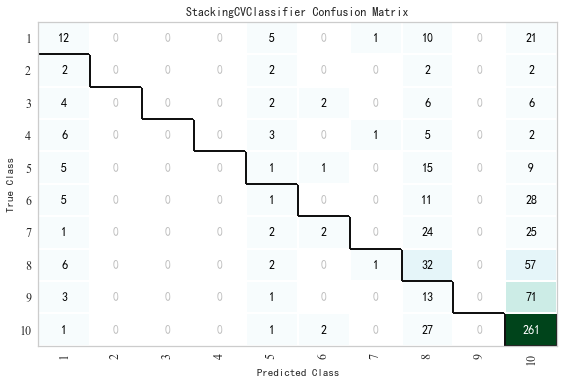

In [102]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FirstModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataTwoFirst_train, ydataTwoFirst_train)
confusion_matrix.score(XdataTwoFirst_test, ydataTwoFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresTwo\\[附件2]模型一混淆矩阵热力图.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

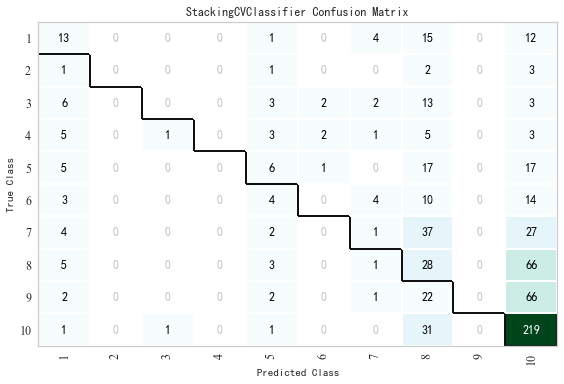

In [103]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(SecondModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataTwoSecond_train, ydataTwoSecond_train)
confusion_matrix.score(XdataTwoSecond_test, ydataTwoSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresTwo\\[附件2]模型二混淆矩阵热力图.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

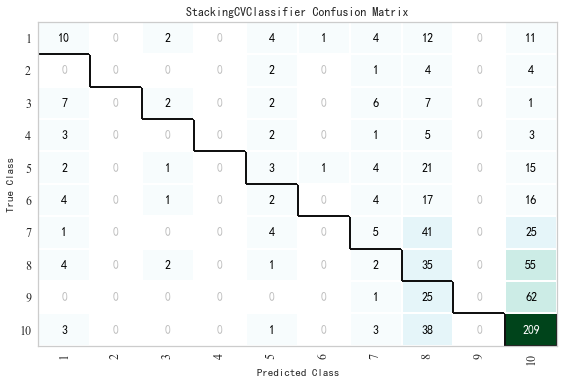

In [104]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(ThirdModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataTwoThird_train, ydataTwoThird_train)
confusion_matrix.score(XdataTwoThird_test, ydataTwoThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresTwo\\[附件2]模型三混淆矩阵热力图.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

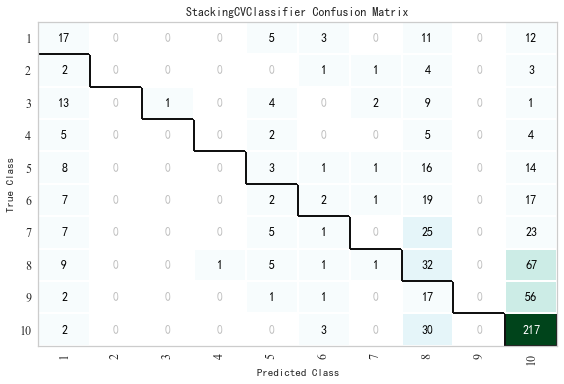

In [105]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FourthModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataTwoFourth_train, ydataTwoFourth_train)
confusion_matrix.score(XdataTwoFourth_test, ydataTwoFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresTwo\\[附件2]模型四混淆矩阵热力图.pdf')

### 分类报告

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

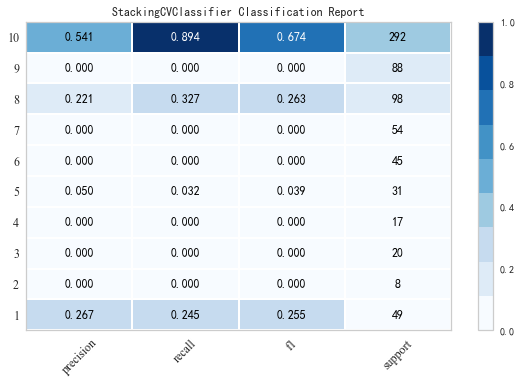

In [106]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FirstModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataTwoFirst_train, ydataTwoFirst_train)
visualizer.score(XdataTwoFirst_test, ydataTwoFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型一分类报告.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

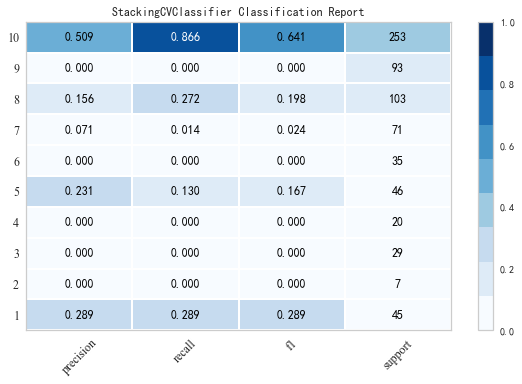

In [107]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(SecondModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataTwoSecond_train, ydataTwoSecond_train)
visualizer.score(XdataTwoSecond_test, ydataTwoSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型二分类报告.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

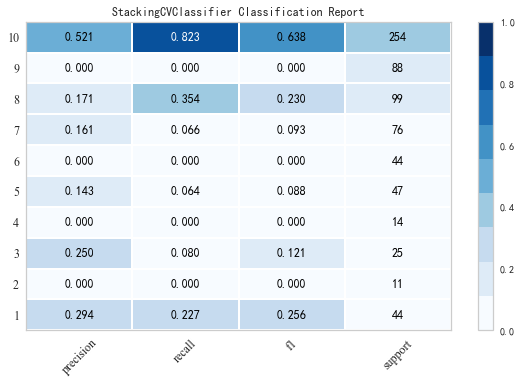

In [108]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(ThirdModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataTwoThird_train, ydataTwoThird_train)
visualizer.score(XdataTwoThird_test, ydataTwoThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型三分类报告.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

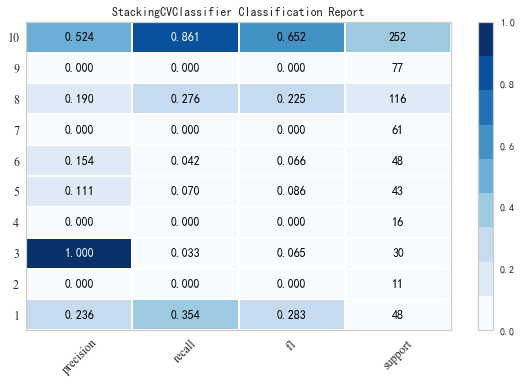

In [109]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FourthModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataTwoFourth_train, ydataTwoFourth_train)
visualizer.score(XdataTwoFourth_test, ydataTwoFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型四分类报告.pdf')

### ROC AUC曲线

#### 模型一

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

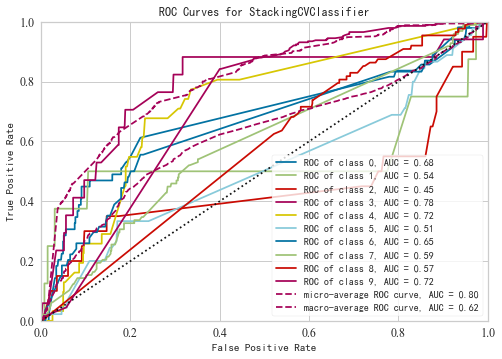

In [110]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FirstModel)
visualizer.fit(XdataTwoFirst_train, ydataTwoFirst_train)
visualizer.score(XdataTwoFirst_test, ydataTwoFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型一ROCAUC.pdf')

#### 模型二

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

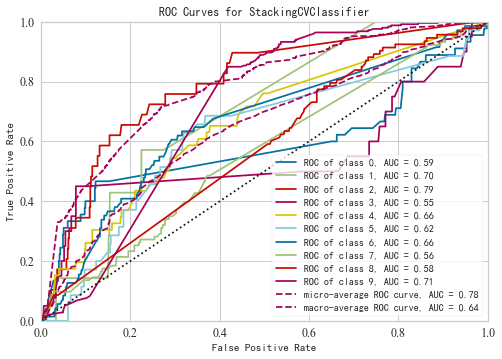

In [111]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SecondModel)
visualizer.fit(XdataTwoSecond_train, ydataTwoSecond_train)
visualizer.score(XdataTwoSecond_test, ydataTwoSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型二ROCAUC.pdf')

#### 模型三

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

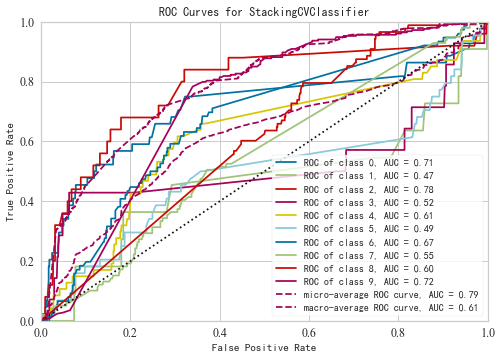

In [112]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(ThirdModel)
visualizer.fit(XdataTwoThird_train, ydataTwoThird_train)
visualizer.score(XdataTwoThird_test, ydataTwoThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型三ROCAUC.pdf')

#### 模型四

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

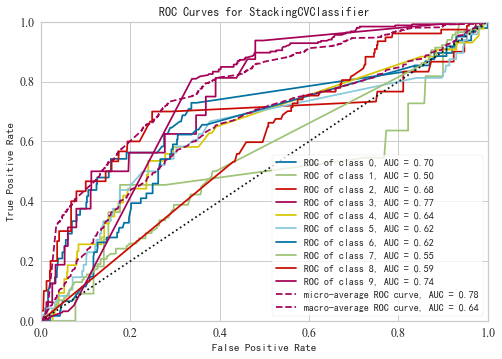

In [113]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FourthModel)
visualizer.fit(XdataTwoFourth_train, ydataTwoFourth_train)
visualizer.score(XdataTwoFourth_test, ydataTwoFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresTwo\\[附件2]模型四ROCAUC.pdf')

### 平均绝对误差、均方误差

#### 模型一

In [114]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, FirstModel.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, FirstModel.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, RandomForestFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, RandomForestFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, XGBFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, XGBFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, KNNFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, KNNFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, SVMFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, SVMFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, LightgbmFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, LightgbmFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFirst_test, LogisticRegressionFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataTwoFirst_test, LogisticRegressionFirst.predict(XdataTwoFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.7094017094017093
模型一均方误差：8.068376068376068
模型一中RF平均绝对误差：1.7692307692307692
模型一中RF均方误差：8.675213675213675
模型一中XGBoost平均绝对误差：1.7222222222222223
模型一中XGBoost均方误差：8.226495726495726
模型一中KNN平均绝对误差：1.8148148148148149
模型一中KNN均方误差：8.626780626780628
模型一中SVM平均绝对误差：1.8575498575498575
模型一中SVM均方误差：9.384615384615385
模型一中LightGBM平均绝对误差：1.7122507122507122
模型一中LightGBM均方误差：8.185185185185185
模型一中LR平均绝对误差：1.7820512820512822
模型一中LR均方误差：8.736467236467236


#### 模型二

In [115]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, SecondModel.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, SecondModel.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, RandomForestSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, RandomForestSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, XGBSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, XGBSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, KNNSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, KNNSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, SVMSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, SVMSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, LightgbmSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, LightgbmSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoSecond_test, LogisticRegressionSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataTwoSecond_test, LogisticRegressionSecond.predict(XdataTwoSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.764957264957265
模型二均方误差：7.7763532763532766
模型二中RF平均绝对误差：1.7321937321937322
模型二中RF均方误差：7.521367521367521
模型二中XGBoost平均绝对误差：1.7863247863247864
模型二中XGBoost均方误差：7.877492877492878
模型二中KNN平均绝对误差：1.7792022792022792
模型二中KNN均方误差：8.027065527065528
模型二中SVM平均绝对误差：1.8504273504273505
模型二中SVM均方误差：8.696581196581196
模型二中LightGBM平均绝对误差：1.7393162393162394
模型二中LightGBM均方误差：7.477207977207978
模型二中LR平均绝对误差：1.8547008547008548
模型二中LR均方误差：8.452991452991453


#### 模型三

In [116]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, ThirdModel.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, ThirdModel.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, RandomForestThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, RandomForestThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, XGBThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, XGBThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, KNNThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, KNNThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, SVMThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, SVMThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, LightgbmThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, LightgbmThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoThird_test, LogisticRegressionThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataTwoThird_test, LogisticRegressionThird.predict(XdataTwoThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.7207977207977208
模型三均方误差：7.313390313390314
模型三中RF平均绝对误差：1.789173789173789
模型三中RF均方误差：7.766381766381766
模型三中XGBoost平均绝对误差：1.7222222222222223
模型三中XGBoost均方误差：6.9586894586894585
模型三中KNN平均绝对误差：1.7806267806267806
模型三中KNN均方误差：7.7094017094017095
模型三中SVM平均绝对误差：1.8518518518518519
模型三中SVM均方误差：8.507122507122507
模型三中LightGBM平均绝对误差：1.7222222222222223
模型三中LightGBM均方误差：7.246438746438747
模型三中LR平均绝对误差：1.8219373219373218
模型三中LR均方误差：8.084045584045585


#### 模型四

In [117]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, FourthModel.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, FourthModel.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, RandomForestFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, RandomForestFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, XGBFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, XGBFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, KNNFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, KNNFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, SVMFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, SVMFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, LightgbmFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, LightgbmFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataTwoFourth_test, LogisticRegressionFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataTwoFourth_test, LogisticRegressionFourth.predict(XdataTwoFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.8276353276353277
模型四均方误差：8.08974358974359
模型四中RF平均绝对误差：1.8347578347578348
模型四中RF均方误差：8.091168091168091
模型四中XGBoost平均绝对误差：1.7792022792022792
模型四中XGBoost均方误差：7.884615384615385
模型四中KNN平均绝对误差：1.7977207977207976
模型四中KNN均方误差：8.105413105413106
模型四中SVM平均绝对误差：1.9259259259259258
模型四中SVM均方误差：9.005698005698006
模型四中LightGBM平均绝对误差：1.8433048433048433
模型四中LightGBM均方误差：8.113960113960115
模型四中LR平均绝对误差：1.8304843304843306
模型四中LR均方误差：8.254985754985755


## 高频词汇云图

In [118]:
import jieba
import wordcloud
from matplotlib.image import imread

jieba.setLogLevel(jieba.logging.INFO)
report = open('上网业务词云.txt', 'r', encoding='utf-8').read()
words = jieba.lcut(report)
txt = []
for word in words:
    if len(word) == 1:
        continue
    else:
        txt.append(word)
a = ' '.join(txt)
bg = imread("bg.jpg")
w = wordcloud.WordCloud(background_color="white", font_path="msyh.ttc", mask=bg)
w.generate(a)
w.to_file("figuresTwo\\wordcloudS.png")